# EMU Plotting and Analysis Tool

## Load Modules

In [42]:
## Load modules
import runpy
import warnings
warnings.filterwarnings('ignore')
from os.path import expanduser, join
user_home_dir = expanduser('~')
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/') #Necessary to find the functions
sys.path.append('/efs_ecco/murricar/emu-utilities/')
from emu_utilities.adjoint_gradient import load_adjoint_gradient
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import cmocean
plt.rcParams.update({'font.size': 14})

***To get help information, including the available arguments, uncomment `help(ept.emu_plot)`.***

In [4]:
#help(ept.emu_plot)

In [18]:
ds = load_adjoint_gradient("/efs_ecco/sjarugul/Project_Datasets/emu_adj_30_33_4_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1")
ds

<xarray.Dataset> Size: 986MB
Dimensions:   (lag: 146, tile: 13, j: 90, i: 90)
Coordinates:
  * lag       (lag) int64 1kB 145 144 143 142 141 140 139 138 ... 6 5 4 3 2 1 0
  * tile      (tile) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j         (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i         (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    xc        (tile, j, i) float64 842kB -111.6 -111.3 -110.9 ... -105.6 -111.9
    yc        (tile, j, i) float64 842kB -88.24 -88.38 -88.52 ... -88.08 -88.1
Data variables:
    empmr     (lag, tile, j, i) float64 123MB nan nan nan nan ... nan nan nan
    pload     (lag, tile, j, i) float64 123MB nan nan nan nan ... nan nan nan
    qnet      (lag, tile, j, i) float64 123MB nan nan nan nan ... nan nan nan
    qsw       (lag, tile, j, i) float64 123MB nan nan nan nan ... nan nan nan
    saltflux  (lag, tile, j, i) float64 123MB nan nan nan nan ... nan nan nan
    spflx     (lag, tile, j, i) float64 123MB nan nan nan nan ... nan nan nan
    tauu      (lag, tile, j, i) float64 123MB nan nan nan nan ... nan nan nan
    tauv      (lag, tile, j, i) float64 123MB nan nan nan nan ... nan nan nan
Attributes:
    created:     2025-05-29T06:15:08.559314
    run_name:    emu_adj_30_33_4_mask3d.105.0_115.0_-12.0_-8.0_10.0_0.0_1
    tool:        adj
    variable:    SSH
    short_name:  sea_surface_height

In [45]:
# if you want to regrid to latlon at lag 4 

lag1=12

new_grid_delta_lat = 1
new_grid_delta_lon = 1

new_grid_min_lat = -90
new_grid_max_lat = 90

new_grid_min_lon = -180
new_grid_max_lon = 180

lon_c, lat_c, _, _, qnet_latlon = ecco.resample_to_latlon(
    ds.xc,
    ds.yc,
    ds.qnet.sel(lag=lag1),
    new_grid_min_lat,
    new_grid_max_lat,
    new_grid_delta_lat,
    new_grid_min_lon,
    new_grid_max_lon,
    new_grid_delta_lon,
    fill_value = np.nan,
    mapping_method = "nearest_neighbor",
)

lon_c1, lat_c1, _, _, empmr_latlon = ecco.resample_to_latlon(
    ds.xc,
    ds.yc,
    ds.empmr.sel(lag=lag1),
    new_grid_min_lat,
    new_grid_max_lat,
    new_grid_delta_lat,
    new_grid_min_lon,
    new_grid_max_lon,
    new_grid_delta_lon,
    fill_value = np.nan,
    mapping_method = "nearest_neighbor",
)

lon_c2, lat_c2, _, _, tauv_latlon = ecco.resample_to_latlon(
    ds.xc,
    ds.yc,
    ds.tauv.sel(lag=lag1),
    new_grid_min_lat,
    new_grid_max_lat,
    new_grid_delta_lat,
    new_grid_min_lon,
    new_grid_max_lon,
    new_grid_delta_lon,
    fill_value = np.nan,
    mapping_method = "nearest_neighbor",
)

lon_c2, lat_c2, _, _, tauu_latlon = ecco.resample_to_latlon(
    ds.xc,
    ds.yc,
    ds.tauu.sel(lag=lag1),
    new_grid_min_lat,
    new_grid_max_lat,
    new_grid_delta_lat,
    new_grid_min_lon,
    new_grid_max_lon,
    new_grid_delta_lon,
    fill_value = np.nan,
    mapping_method = "nearest_neighbor",
)

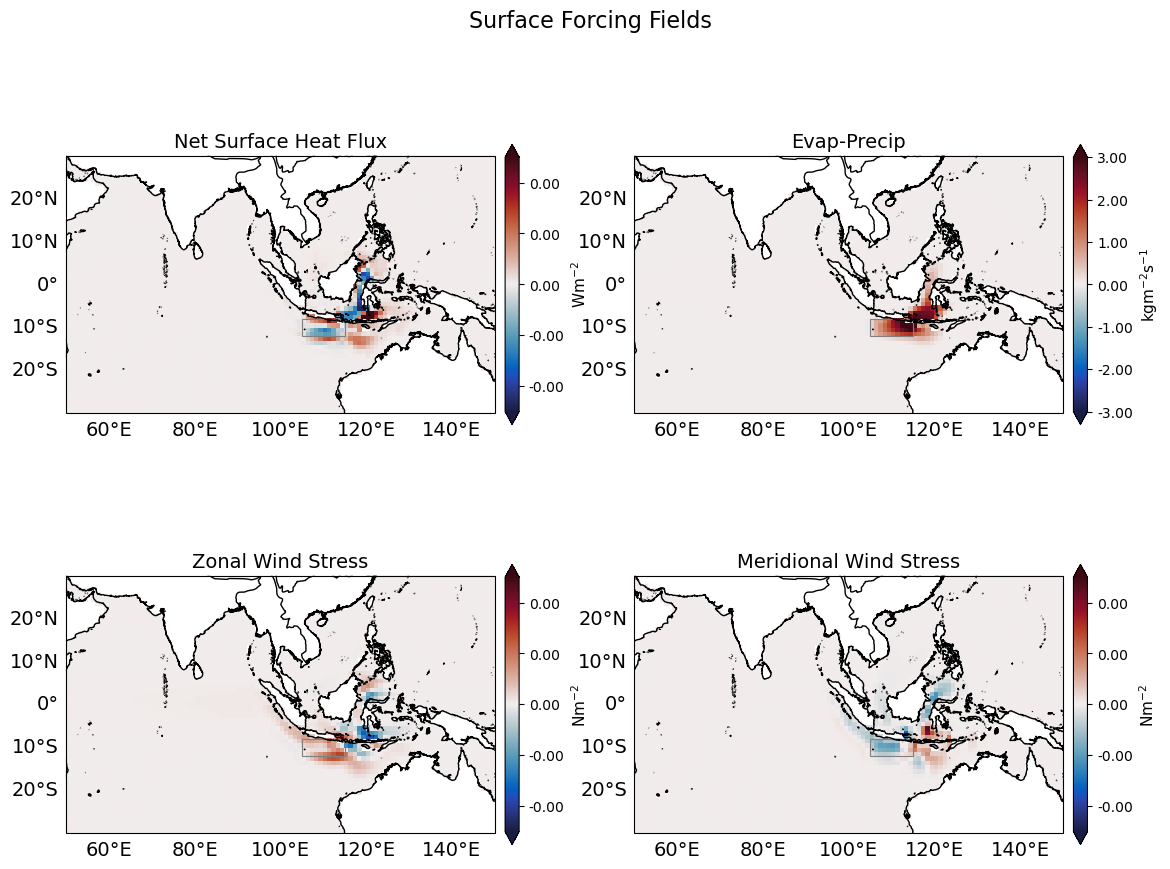

<Figure size 640x480 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import cmocean
from matplotlib.ticker import FormatStrFormatter

# Set map domain
lonmapmin = 50
lonmapmax = 150
latmapmin = -30
latmapmax = 30
cmap = cmocean.cm.balance

# Create figure and axes
fig, ax = plt.subplots(2, 2, figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.1, hspace=0.2)

# Data and parameters
data_list = [
    (qnet_latlon, 'Wm$^{-2}$', -2.5E-7, 2.5E-7, 'Net Surface Heat Flux'),
    (empmr_latlon, 'kgm$^{-2}$s$^{-1}$', -3, 3, 'Evap-Precip'),
    (tauu_latlon, 'Nm$^{-2}$', -0.005, 0.005, 'Zonal Wind Stress'),
    (tauv_latlon, 'Nm$^{-2}$', -0.005, 0.005, 'Meridional Wind Stress'),
]

# Loop through subplots
for i, ax_i in enumerate(ax.flat):
    data, cbar_label, vmin, vmax, title = data_list[i]
    
    pcm = ax_i.pcolor(lon_c, lat_c, data, cmap=cmap, vmin=vmin, vmax=vmax)
    ax_i.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=ccrs.PlateCarree())
    ax_i.coastlines('10m')
    ax_i.add_feature(cfeature.RIVERS, color='black')
    
    # Add rectangle in region of interest
    ax_i.add_patch(mpatches.Rectangle(
        xy=[105, -12], width=10, height=4,
        linewidth=0.8, facecolor='none', edgecolor='gray',
        transform=ccrs.PlateCarree()
    ))
    
    # Labels and ticks on all axes
    gl1 = ax_i.gridlines(draw_labels=True, x_inline=False, y_inline=False, linewidth=0.0)
    gl1.top_labels=False   # suppress top labels
    gl1.right_labels=False # suppress right labels
    gl1.bottom_labels=True # suppress right labels
    
    ax_i.set_title(title, fontsize=14)
    
    # Colorbar with 2 decimal places
    cbar = fig.colorbar(pcm, ax=ax_i, orientation='vertical', pad=0.02, shrink=0.8, extend='both', format=FormatStrFormatter('%.2f'))
    cbar.set_label(cbar_label, fontsize=11)
    cbar.ax.tick_params(labelsize=10)

plt.suptitle("Surface Forcing Fields", fontsize=16)
plt.show()
plt.savefig('adjoint_sss_lag12.png')
